<a href="https://colab.research.google.com/github/yoonandmoon/GS_team/blob/main/peekday(v_jw_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#데이터프레임 불러오기
df = pd.read_csv('/content/R_gs_stock(ver.210801_231027).csv')

In [ ]:
# 'date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# 날짜를 2개월 단위로 구간을 나누기
df['date_section'] = pd.cut(df['date'], pd.date_range(start='2021-07-31', end='2023-10-31', freq='1M'))

In [ ]:
# # 각 구간별로 거래량 상위 5% 찾기
# peekday = df.groupby('date_section')['거래량'].quantile(0.95)

In [ ]:
#각 구간별로 거래량 상위 5%에 해당하는 날짜 찾기
peekday = df.groupby('date_section').apply(lambda x: x[x['거래량'] >= x['거래량'].quantile(0.85)]['date'])


In [ ]:
pd.set_option('display.max_rows', None)
print(peekday)

date_section                 
(2021-07-31, 2021-08-31]  10    2021-08-17
                          12    2021-08-19
                          19    2021-08-30
                          20    2021-08-31
(2021-08-31, 2021-09-30]  26    2021-09-08
                          32    2021-09-16
                          33    2021-09-17
(2021-09-30, 2021-10-31]  42    2021-10-06
                          47    2021-10-14
                          57    2021-10-28
(2021-10-31, 2021-11-30]  63    2021-11-05
                          66    2021-11-10
                          67    2021-11-11
                          80    2021-11-30
(2021-11-30, 2021-12-31]  84    2021-12-06
                          100   2021-12-28
                          101   2021-12-29
                          102   2021-12-30
(2021-12-31, 2022-01-31]  105   2022-01-05
                          106   2022-01-06
                          114   2022-01-18
(2022-01-31, 2022-02-28]  124   2022-02-04
                        

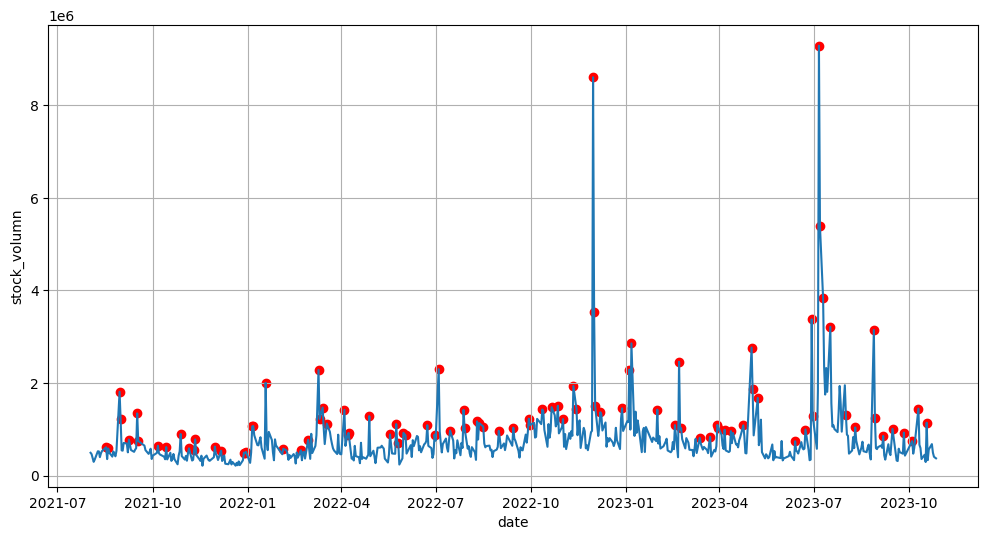

In [ ]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['거래량'], label='v')
# 결과 데이터프레임에서 상위 5% 거래량에 해당하는 날짜를 점으로 찍어줍니다.
for date in peekday:
    plt.scatter(date, df[df['date'] == date]['거래량'], color='red', marker='o', label='Top 5%')

plt.xlabel('date')
plt.ylabel('stock_volumn')
# plt.title('거래량 그래프')
plt.grid()
plt.show()